# Imports

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# To import from this project
import sys
sys.path.insert(0, '..')

# HDPGMM

In [ ]:
from models.dpgmm import DPGMM

## Sample generation
Generate samples from a DPGMM with random parameters.

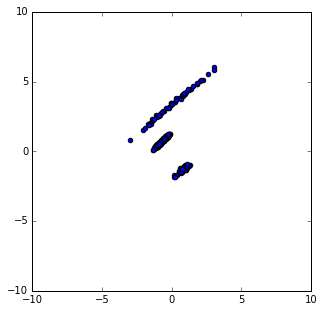

pi: [[ 0.09392322]
 [ 0.10839554]
 [ 0.79768124]]

mu: [[ 0.81390622 -1.30424917]
 [ 0.04861925  3.42821529]
 [-0.6714601   0.75682832]]

cov: [[[ 0.09111677  0.06150049]
  [ 0.06150049  0.05657999]]

 [[ 1.66687538  1.42186311]
  [ 1.42186311  1.21923765]]

 [[ 0.05592352  0.05249207]
  [ 0.05249207  0.05135281]]]

assigment counts 0: 45
assigment counts 1: 54
assigment counts 2: 401


In [33]:
# Settings
N = 500
d = 2
K = 3

# Feed
X = multivariate_normal.rvs(mean=[0., 0.], cov=np.eye(d), size = N)

# Create a random DPGMM and sample from it
dpgmm = DPGMM()
dpgmm.set_random_parameters(X, K)
X = dpgmm.sample(N, sort=True)

# Plot samples
fig = plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1])
plt.axis([-10, 10, -10, 10])
plt.show()

print("pi: " + str(dpgmm.pi))
print("")
print("mu: " + str(dpgmm.mu))
print("")
print("cov: " + str(dpgmm.cov))
print("")
for i in range(dpgmm.K_active):
    print("assigment counts " + str(i) + ": " + str(np.count_nonzero(dpgmm.z == i)))

In [34]:
cm_true = np.zeros((N, N))
cm_true = dpgmm.update_confusion_matrix(cm_true)

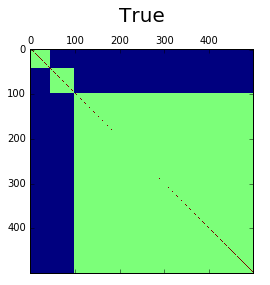

In [35]:
plt.matshow(cm_true)
plt.title('True', size=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.10])
plt.show()

## Clustering
Fit a DPGMM to the generated data and evaluate the obtained clustering with a confusion matrix.

In [36]:
cm = dpgmm.fit(X, n_iterations=150, n_burnin=100, return_cm=True)

100%|██████████| 150/150 [01:37<00:00,  1.53it/s]


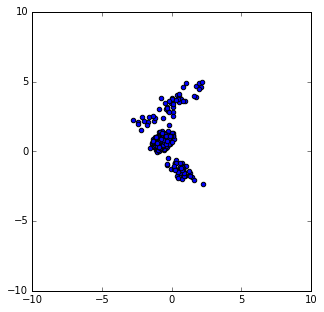

K_active: 3
pi: [[ 0.7820499 ]
 [ 0.10668872]
 [ 0.11126137]]

mu: [[-0.68701528  0.7325503 ]
 [ 0.72016066 -1.29629563]
 [ 0.20713102  3.53014321]]

cov: [[[ 0.09135517  0.02940468]
  [ 0.02940468  0.07219301]]

 [[ 0.28493393 -0.13047143]
  [-0.13047143  0.14362952]]

 [[ 1.48749836  0.89971813]
  [ 0.89971813  0.80786509]]]

assigment counts 0: 400
assigment counts 1: 51
assigment counts 2: 49


In [38]:
# Sample from the fitted DPGMM
X = dpgmm.sample(N)
    
# Plot samples to compare with the original data
fig = plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1])
plt.axis([-10, 10, -10, 10])
plt.show()

print("K_active: " + str(dpgmm.K_active))
print("pi: " + str(dpgmm.pi))
print("")
print("mu: " + str(dpgmm.mu))
print("")
print("cov: " + str(dpgmm.cov))
print("")
for i in range(dpgmm.K_active):
    print("assigment counts " + str(i) + ": " + str(np.count_nonzero(dpgmm.z == i)))

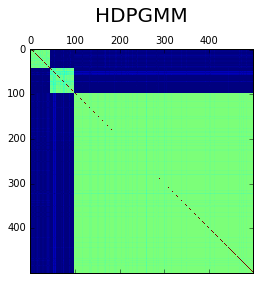

In [39]:
plt.matshow(cm)
plt.title('HDPGMM', size=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.10])
plt.show()

# BISCUIT

In [2]:
from models.biscuit import Biscuit

## Sample generation
Generate samples from a BISCUIT with random parameters.

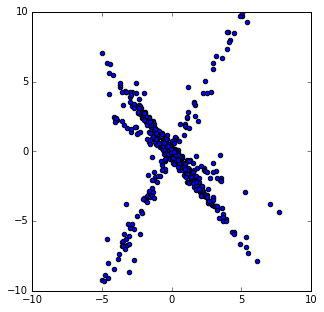

pi: [[ 0.20106289]
 [ 0.14267323]
 [ 0.65626388]]

mu: [[ 1.62211994  3.12174073]
 [ 1.24892671 -0.71376344]
 [-1.03662568  1.33885157]]

cov: [[[ 0.01941433 -0.00546474]
  [-0.00546474  0.00394079]]

 [[ 0.01963131 -0.00234593]
  [-0.00234593  0.00308244]]

 [[ 0.01675897 -0.00199012]
  [-0.00199012  0.00359362]]]

assigment counts 0: 120
assigment counts 1: 73
assigment counts 2: 307


In [4]:
# Settings
N = 500
d = 2
K = 3

# Feed
X = multivariate_normal.rvs(mean=[0., 0.], cov=np.eye(d), size = N)

# Create a random Biscuit and sample from it
biscuit = Biscuit()
biscuit.set_random_parameters(X, K)
X = biscuit.sample(N, sort=True)

# Plot samples
fig = plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1])
plt.axis([-10, 10, -10, 10])
plt.show()

print("pi: " + str(biscuit.pi))
print("")
print("mu: " + str(biscuit.mu))
print("")
print("cov: " + str(biscuit.cov))
print("")
for i in range(biscuit.K_active):
    print("assigment counts " + str(i) + ": " + str(np.count_nonzero(biscuit.z == i)))

## Clustering
Fit a Biscuit to the generated data and evaluate the obtained clustering with a confusion matrix.

In [5]:
cm = biscuit.fit(X, n_iterations=150, n_burnin=100, return_cm=True)

  1%|          | 1/150 [00:01<02:33,  1.03s/it]../models/biscuit.py:89: RuntimeWarning: invalid value encountered in divide
  probs = probs / np.sum(probs)
../models/biscuit.py:91: RuntimeWarning: invalid value encountered in less
  self.z[n] = np.random.choice(range(self.K_active + self.n_aux), p=probs)
100%|██████████| 150/150 [02:56<00:00,  1.18s/it]


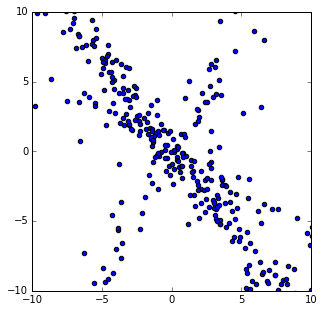

K_active: 7
pi: [[ 0.54731655]
 [ 0.03054626]
 [ 0.09484245]
 [ 0.15063648]
 [ 0.0940181 ]
 [ 0.01674297]
 [ 0.06589719]]

mu: [[ 0.34222313 -0.48838684]
 [-2.28590542 -4.57662293]
 [-0.86880931 -1.4973516 ]
 [ 0.0365925  -0.07361179]
 [-0.05754413  0.21631135]
 [ 3.72796018  7.09535606]
 [-3.31850512 -6.27026757]]

cov: [[[  2.01152517e+01  -2.58118474e+01]
  [ -2.58118474e+01   3.36246831e+01]]

 [[  1.58463232e+01   2.96679469e+01]
  [  2.96679469e+01   5.64297961e+01]]

 [[  1.02392715e+01   1.92079284e+01]
  [  1.92079284e+01   3.67135201e+01]]

 [[  1.67375186e+01  -1.00068150e+01]
  [ -1.00068150e+01   6.11942564e+00]]

 [[  5.20754470e+02  -5.71743752e+02]
  [ -5.71743752e+02   7.24912297e+02]]

 [[  1.61391999e+00   2.83387026e+00]
  [  2.83387026e+00   5.90368717e+00]]

 [[  6.41240973e+02   1.26071340e+03]
  [  1.26071340e+03   2.48569414e+03]]]

assigment counts 0: 278
assigment counts 1: 14
assigment counts 2: 50
assigment counts 3: 65
assigment counts 4: 47
assigment coun

In [6]:
# Sample from the fitted Biscuit
X = biscuit.sample(N)
    
# Plot samples to compare with the original data
fig = plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1])
plt.axis([-10, 10, -10, 10])
plt.show()

print("K_active: " + str(biscuit.K_active))
print("pi: " + str(biscuit.pi))
print("")
print("mu: " + str(biscuit.mu))
print("")
print("cov: " + str(biscuit.cov))
print("")
for i in range(biscuit.K_active):
    print("assigment counts " + str(i) + ": " + str(np.count_nonzero(biscuit.z == i)))

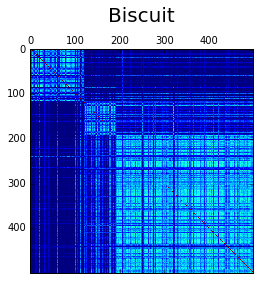

In [7]:
plt.matshow(cm)
plt.title('Biscuit', size=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.10])
plt.show()